# Instacart basket analysis project
## AIT664_DL2
## Group4 [Chanyoung Park, Oluwasegun Adegoke, Saketh Kallepalli, Zijie He]
## Professor: Dr. Sultana

## 1. Environment Setup and Data Loading

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

root = 'C:/Users/cytim/OneDrive/바탕 화면/AIT 664/'

aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

files = ['aisles', 'departments', 'orders', 'order_products__prior', 'order_products__train', 'products']
data = {file: pd.read_csv(os.path.join(root, f'{file}.csv')) for file in files}

## 2. Basic Data Information Check

In [5]:
# Basic info and their heads. I just want to use an interface that shows the previous results.
def show_dataset_info(data_dict):
    for name, df in data_dict.items():
        print(f'# {name} dataset')
        print(f'**Shape**: {df.shape}')
        print(df.info())
        print(f'first five lines：\n{df.head()}')
        print('---') 
        print('\n')
        
show_dataset_info(data)

# aisles dataset
**Shape**: (134, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
first five lines：
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
---


# departments dataset
**Shape**: (21, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
first five li

## 3. Merging Process

In [6]:
# firstly, we have to merge the two product datasets.
order_products = pd.concat([data['order_products__prior'], data['order_products__train']], axis=0)

print(f'merged order_products: {order_products.shape}')
print(order_products.info())

merged order_products: (33819106, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB
None


In [7]:
# then we have to merge the rest of datasets.
order_products = order_products.merge(data['products'], on='product_id', how='left')  
order_products = order_products.merge(data['aisles'], on='aisle_id', how='left')      
order_products = order_products.merge(data['departments'], on='department_id', how='left')  
order_products = order_products.merge(data['orders'], on='order_id', how='left')     

# result
print(f'Merged_order_products dataset: {order_products.shape}')
print(order_products.info())

Merged_order_products dataset: (33819106, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB
None


In [9]:
order_products.head(30)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,prior,3,5,9,8.0
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,202279,prior,3,5,9,8.0
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,205970,prior,16,5,17,12.0


In [10]:
col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day',
 'days_since_prior_order']

In [11]:
order_products = order_products[col_order]

In [12]:
order_products.head(5)

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,202279,2,33120,86,16,1,1,Organic Egg Whites,eggs,dairy eggs,prior,3,5,9,8.0
1,202279,2,28985,83,4,2,1,Michigan Organic Kale,fresh vegetables,produce,prior,3,5,9,8.0
2,202279,2,9327,104,13,3,0,Garlic Powder,spices seasonings,pantry,prior,3,5,9,8.0
3,202279,2,45918,19,13,4,1,Coconut Butter,oils vinegars,pantry,prior,3,5,9,8.0
4,202279,2,30035,17,13,5,0,Natural Sweetener,baking ingredients,pantry,prior,3,5,9,8.0


## Handling Missing Values in days_since_prior_order: 
* replace the missing values in days_since_prior_order with a placeholder (like 0), assuming these represent the user's first order.

In [13]:
print(order_products.isnull().sum())

user_id                         0
order_id                        0
product_id                      0
aisle_id                        0
department_id                   0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle                           0
department                      0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64


In [15]:
# Fill missing values in days_since_prior_order with 0 (first order assumption)
order_products['days_since_prior_order'].fillna(0, inplace=True)

# Verify that no missing values remain
print(order_products.isnull().sum())


user_id                   0
order_id                  0
product_id                0
aisle_id                  0
department_id             0
add_to_cart_order         0
reordered                 0
product_name              0
aisle                     0
department                0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [16]:
order_products.to_csv(os.path.join(root, 'merged_order_products.csv'), index=False)

## Project Flow and Explanation (After Merging)
### 1. Feature Extraction after Merging
- After merging the datasets (orders, products, aisles, departments, etc.), we focus on extracting relevant features to capture user behavior, product characteristics, and user-product interactions. This will help in predicting reorders and answering the sub-questions.

### 2. Why Feature Extraction is Important:
- **User Features** capture the **buying patterns** of individual users (e.g., how frequently they order, when they tend to order).
- **Product Features** capture the **popularity and demand** of products (e.g., how often a product is reordered, its importance in the cart).
- **User-Product Interaction Features** help personalize predictions by understanding the relationship between a specific user and a product.

In [47]:
# Step 1: Extract User Features
user_features = orders.groupby('user_id').agg({
    'order_number': 'max',  # Total number of orders per user
    'days_since_prior_order': 'mean',  # Average time between orders
    'order_hour_of_day': ['mean', 'std'],  # Mean and standard deviation of order times (hour of day)
}).reset_index()

# Extract the most frequent day of the week for each user using value_counts().idxmax() for efficiency
user_dow_mode = orders.groupby('user_id')['order_dow'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Rename the columns for easier understanding
user_features.columns = ['user_id', 'total_orders', 'mean_days_since_prior', 'mean_order_hour', 'std_order_hour']
user_dow_mode.columns = ['user_id', 'most_common_order_dow']

# Merge user features with the most common order_dow
user_features = user_features.merge(user_dow_mode, on='user_id', how='left')

print("User features:\n", user_features.head())


User features:
    user_id  total_orders  mean_days_since_prior  mean_order_hour  \
0        1            11              19.000000        10.090909   
1        2            15              16.285714        10.600000   
2        3            13              12.000000        16.307692   
3        4             6              17.000000        12.500000   
4        5             5              11.500000        15.000000   

   std_order_hour  most_common_order_dow  
0        3.477198                      4  
1        1.502379                      1  
2        1.436698                      0  
3        1.516575                      4  
4        3.316625                      3  


In [48]:
# Step 2: Extract Product Features
product_features = order_products.groupby('product_id').agg({
    'reordered': ['mean', 'sum'],  # Reorder rate and total reorders of the product
    'add_to_cart_order': 'mean',  # Average position of the product in the cart
    'order_id': 'count'  # Total number of orders containing this product
}).reset_index()

# Find the most common day the product is ordered using value_counts().idxmax()
product_dow_mode = order_products.groupby('product_id')['order_dow'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Rename the columns for readability
product_features.columns = ['product_id', 'reorder_rate', 'total_reorders', 'mean_add_to_cart_order', 'total_orders']
product_dow_mode.columns = ['product_id', 'most_common_product_order_dow']

# Merge with product features
product_features = product_features.merge(product_dow_mode, on='product_id', how='left')

print("Product features:\n", product_features.head())


Product features:
    product_id  reorder_rate  total_reorders  mean_add_to_cart_order  \
0           1      0.614627            1185                5.845954   
1           2      0.138298              13               10.138298   
2           3      0.738516             209                6.374558   
3           4      0.458689             161                9.472934   
4           5      0.625000              10                6.375000   

   total_orders  most_common_product_order_dow  
0          1928                              1  
1            94                              0  
2           283                              1  
3           351                              0  
4            16                              0  


In [49]:
# Step 3: Extract User-Product Interaction Features
user_product_features = order_products.groupby(['user_id', 'product_id']).agg({
    'reordered': ['sum', 'mean'],  # Total reorders by the user and reorder rate for the product
    'add_to_cart_order': 'mean',  # Average position in the cart for that user-product pair
    'order_id': 'count'  # Total number of orders containing that product by the user
}).reset_index()

# Find the most common day the user orders the product using value_counts().idxmax()
user_product_dow_mode = order_products.groupby(['user_id', 'product_id'])['order_dow'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Rename the columns for easier interpretation
user_product_features.columns = ['user_id', 'product_id', 'total_reorders_by_user', 'reorder_rate_by_user', 'mean_add_to_cart_by_user', 'total_orders_by_user']
user_product_dow_mode.columns = ['user_id', 'product_id', 'most_common_user_product_order_dow']

# Merge user-product interaction features with the most common day of the week
user_product_features = user_product_features.merge(user_product_dow_mode, on=['user_id', 'product_id'], how='left')

print("User-Product interaction features:\n", user_product_features.head())


User-Product interaction features:
    user_id  product_id  total_reorders_by_user  reorder_rate_by_user  \
0        1         196                      10              0.909091   
1        1       10258                       9              0.900000   
2        1       10326                       0              0.000000   
3        1       12427                       9              0.900000   
4        1       13032                       3              0.750000   

   mean_add_to_cart_by_user  total_orders_by_user  \
0                  1.363636                    11   
1                  3.600000                    10   
2                  5.000000                     1   
3                  3.300000                    10   
4                  6.500000                     4   

   most_common_user_product_order_dow  
0                                   4  
1                                   4  
2                                   4  
3                                   4  
4           

In [50]:
# Step 4: Combine All Features into One Final Dataset
# After extracting features from users, products, and user-product interactions, we merge them into one final dataset.

# Merge user-product features with user features
final_df = user_product_features.merge(user_features, on='user_id', how='left')

# Merge the combined user and user-product features with product features
final_df = final_df.merge(product_features, on='product_id', how='left')

print("Final dataset after merging all features:\n", final_df.head())

# Save the final dataset for future use
final_df.to_csv(os.path.join(root, 'final_featured_data_with_time_revised.csv'), index=False)

# Explanation:
# - The final dataset now contains all the necessary features for building a predictive model.
# - This dataset captures both general user behavior and product characteristics, as well as specific user-product interactions.


Final dataset after merging all features:
    user_id  product_id  total_reorders_by_user  reorder_rate_by_user  \
0        1         196                      10              0.909091   
1        1       10258                       9              0.900000   
2        1       10326                       0              0.000000   
3        1       12427                       9              0.900000   
4        1       13032                       3              0.750000   

   mean_add_to_cart_by_user  total_orders_by_user  \
0                  1.363636                    11   
1                  3.600000                    10   
2                  5.000000                     1   
3                  3.300000                    10   
4                  6.500000                     4   

   most_common_user_product_order_dow  total_orders_x  mean_days_since_prior  \
0                                   4              11                   19.0   
1                                   4        

## Final Explanations:
### **User Features:**

- These features capture user behavior such as how frequently they order, the average time between orders, and at what times (hour of day) and on which days (day of the week) they typically order. This information is useful for predicting when a user will place their next order and which products are more likely to be reordered, providing crucial insights for future predictions.

### **Product Features:**

- Product-level characteristics such as reorder rate and position in the cart help identify popular products and reveal their importance in the shopping cart. These features also indicate how likely products are to be reordered and when they are typically reordered, directly answering questions about frequently reordered products.

### **User-Product Interaction Features:**

- These features capture personalized insights by analyzing how a specific user interacts with specific products over time. This data is critical for predicting whether a user will reorder a particular product and helps optimize product recommendations based on past behavior, providing valuable information for personalization.

## Dimensionality Reduction:
In this project, dimensionality reduction was not required, as each feature contributes directly to answering the research questions. However, if the dataset grows too large or becomes computationally expensive, dimensionality reduction techniques like Principal Component Analysis (PCA) or feature selection could be explored to streamline the dataset without losing important information.

## The way of Answering the Research Questions:

### Main Research Question:

**How can we predict which products a customer will reorder in their next grocery order?**

The features extracted from user behavior, product characteristics, and user-product interactions provide the necessary information to build a machine learning model that predicts which products a customer will reorder. These features, especially reorder rates and interaction patterns, are key for understanding the likelihood of future purchases.

### Sub-question 1:

**What are the most frequently reordered products?**

The reorder_rate feature provides direct insights into which products are reordered most frequently, allowing us to identify the top products that customers tend to repurchase.

### Sub-question 2:

**Are there patterns in reordering based on time (e.g., day of the week or time of day)?**

Time-related features such as most_common_order_dow (day of the week) and mean_order_hour (time of day) allow us to analyze and visualize ordering patterns. These features help in identifying if there are specific days or times when reorders are more likely, answering the question of temporal ordering patterns.

### Sub-question 3:

**How can product recommendations be optimized based on previous purchases?**

By leveraging user-product interaction features such as reorder_rate_by_user and mean_add_to_cart_by_user, product recommendations can be personalized. These features help predict which products are most important to each user and which are most likely to be reordered based on their unique purchase history.

## EDA for the Instacart Dataset based on the research questions

In [57]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final merged dataset
final_df= pd.read_csv('C:/Users/cytim/OneDrive/바탕 화면/AIT 664/final_featured_data_with_time_revised.csv')

# Set plot style for consistency
sns.set(style="whitegrid")

## Sub-question 1: What are the most frequently reordered products?
**Graph:** The bar chart titled "Top 10 Most Frequently Reordered Products" shows the total number of reorders for the top 10 products, with product IDs along the x-axis and the total reorder count on the y-axis.**

**Answer:**

The most frequently reordered product is product ID 24852, followed by product ID 13176 and product ID 21137. These products have the highest total reorder counts, suggesting they are the most essential or frequently purchased items by customers.

- Old Indian Wild Cherry Bark Syrup : 24852,
- Bag of Organic Bananas : 13176
- Organic Strawberries : 21137
- Organic Baby Spinach : 21903
- Organic Hass Avocado :47209
- Organic Avocado : 47766
- Organic Whole Milk : 27845
- Large Lemon : 47626
- Organic Raspberries : 27966
- Strawberries : 16797

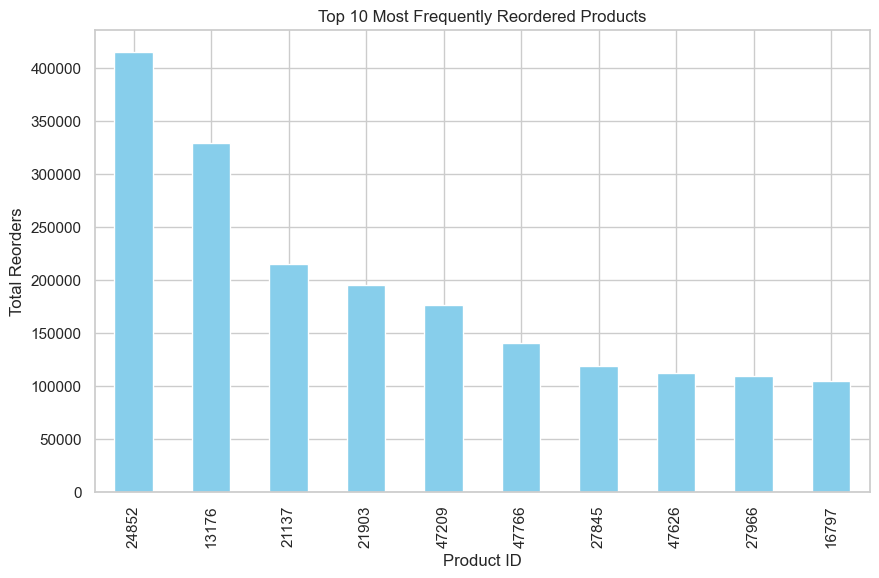

In [58]:
# 1. What are the most frequently reordered products?

# Calculate the total reorders per product
most_reordered_products = final_df.groupby('product_id')['total_reorders_by_user'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 most reordered products
plt.figure(figsize=(10, 6))
most_reordered_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequently Reordered Products')
plt.xlabel('Product ID')
plt.ylabel('Total Reorders')
plt.show()


## Sub-question 2: Are there patterns in reordering based on time (e.g., day of the week or time of day)?
**Graph 1:** "Distribution of Orders by Day of the Week" shows the distribution of orders across the days of the week, with day 0 (Sunday) having the highest number of orders, followed by day 1 (Monday).

**Graph 2:** "Distribution of Orders by Hour of the Day" shows that the most orders are placed between 12 PM to 3 PM, with a peak around 2 PM.

**Answer:**

Day of the Week: There is a clear pattern showing that most orders occur on Sunday, followed by Monday. this suggests that customers prefer placing orders towards the end of the weekend and the beginning of the week, possibly to stock up for the coming week. Thursday has the lowest order activity, possibly indicating that fewer customers are placing orders at the end of the workweek.

Time of Day: Customers tend to place orders in the afternoon, with the highest activity around 2 PM. This could indicate that customers are making their purchases during lunchtime or early in the afternoon.

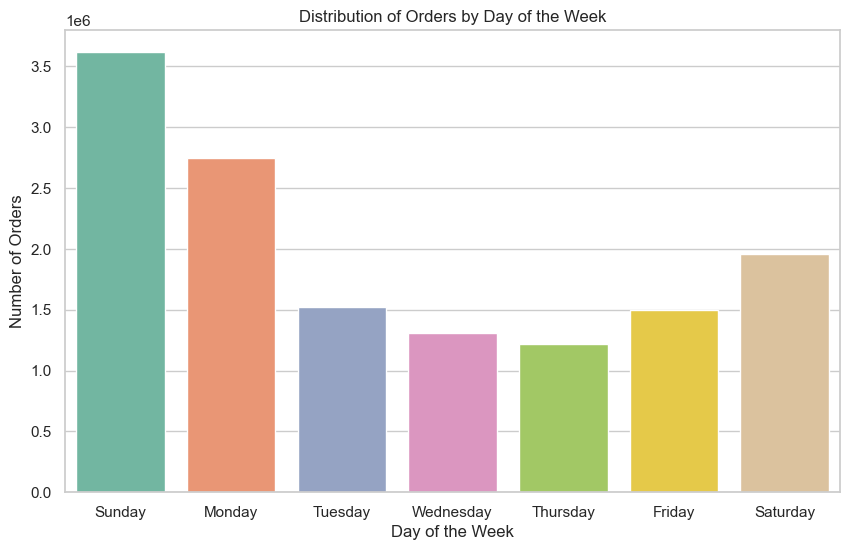

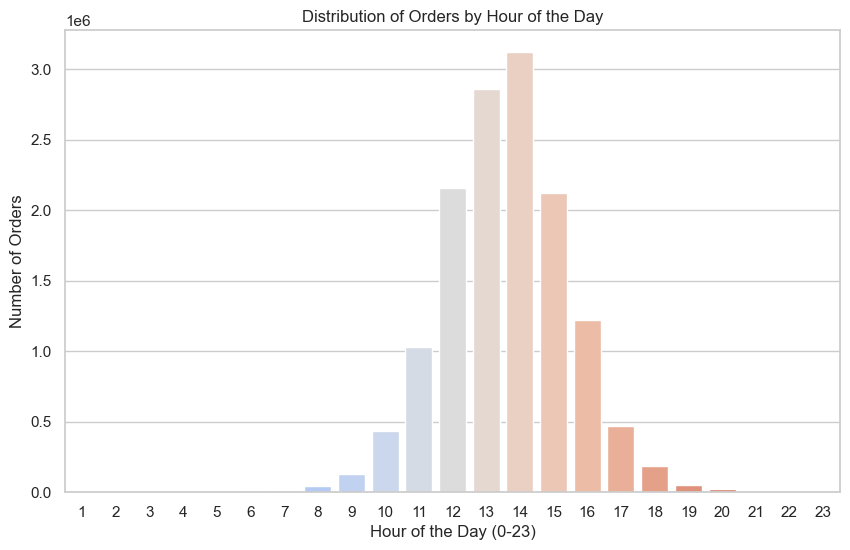

In [70]:
# 2. Are there patterns in reordering based on time (Day of the Week)?

# Day of the week analysis 

# Create a mapping of numeric days to actual day names
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

# Replace the numeric day values in the 'most_common_order_dow' with the corresponding day names
final_df['day_name'] = final_df['most_common_order_dow'].map(day_names)

# Plot with correct day names and the correct order of the days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10, 6))
sns.countplot(x='day_name', data=final_df, palette='Set2', order=day_order)
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


# Round 'mean_order_hour' to the nearest integer for clearer plotting
final_df['order_hour_rounded'] = final_df['mean_order_hour'].round().astype(int)

# Time of day analysis (updated with 'order_hour_rounded')
plt.figure(figsize=(10, 6))
sns.countplot(x='order_hour_rounded', data=final_df, palette='coolwarm')
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Orders')
plt.show()


## Sub-question 3: How can product recommendations be optimized based on previous purchases?

**Graph 1:** The "Distribution of Reorder Rates by User" graph shows that a majority of users have very low reorder rates, while a small group of users has significantly higher reorder rates. This suggests that personalized recommendations should focus on users with higher reorder rates, who are more likely to repurchase products.

**Graph 2:** The "Distribution of Add-to-Cart Position by User-Product Pairs" graph shows that most products are added to the cart in the earlier positions (between positions 1 and 20). The frequency of products being added decreases significantly as the add-to-cart position increases.

**Graph 3:** The "Reorder Rates of Top Products by Day of the Week" graph shows that certain products (represented by their reorder rates) are reordered more frequently on specific days. For example, the reorder rate is highest Sunday, suggesting that recommendations could be optimized based on both product reorder frequency and the day of the week.

**Answer:**

High-priority products that are added early in the cart should be recommended to users consistently, as they are likely to be repeat purchases.
Recommendations can also be timed to align with days when users are most likely to reorder, such as Sunday.
Furthermore, personalized recommendations can be generated by leveraging reorder rates by user and suggesting products that have historically been reordered by that specific user.

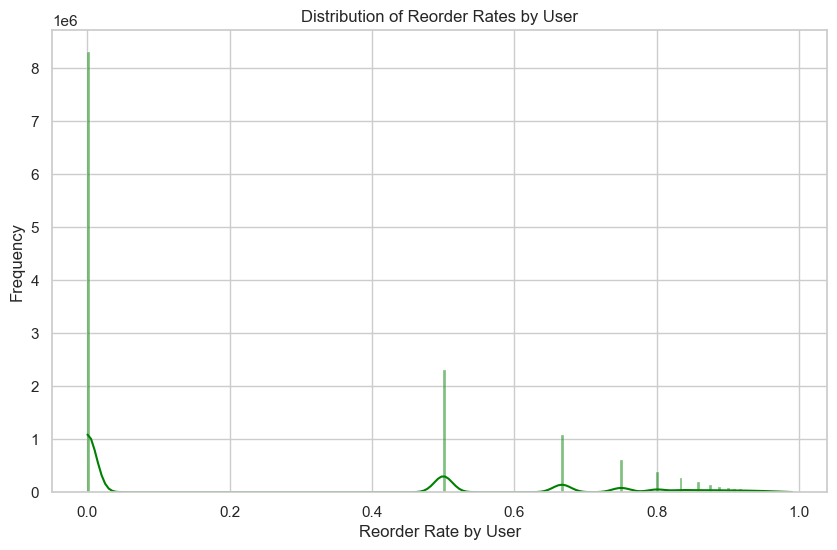

In [71]:
# 3. How can product recommendations be optimized based on previous purchases?

# Analyzing reorder rate by user
plt.figure(figsize=(10, 6))
sns.histplot(final_df['reorder_rate_by_user'], kde=True, color='green')
plt.title('Distribution of Reorder Rates by User')
plt.xlabel('Reorder Rate by User')
plt.ylabel('Frequency')
plt.show()

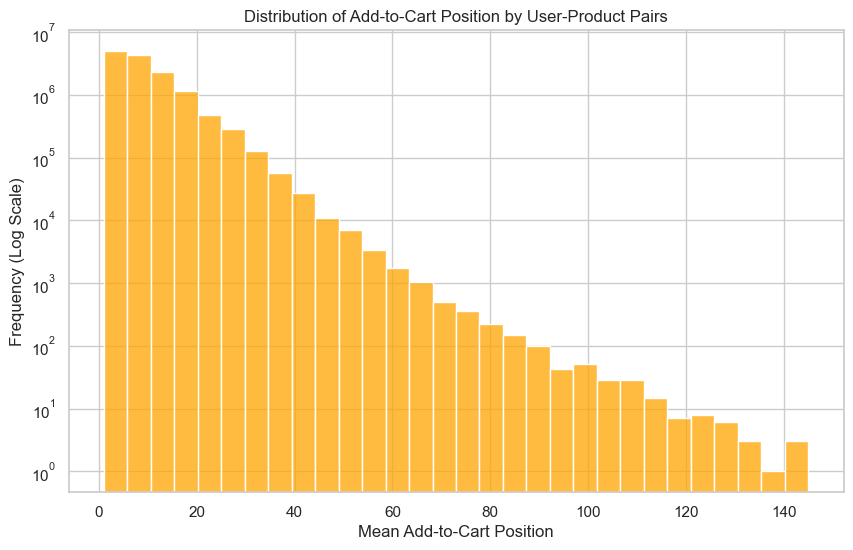

In [72]:
# 4. Add-to-cart position analysis for user-product interaction 
#Distribution of Add-to-Cart Position by User-Product Pairs (Logarithmic Scale)

# Create the plot with log scale on the y-axis
plt.figure(figsize=(10, 6))
sns.histplot(final_df['mean_add_to_cart_by_user'], kde=False, bins=30, color='orange')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.title('Distribution of Add-to-Cart Position by User-Product Pairs')
plt.xlabel('Mean Add-to-Cart Position')
plt.ylabel('Frequency (Log Scale)')
plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30588\3646772669.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_products_data['day_name'] = top_5_products_data['most_common_order_dow'].map(day_names)


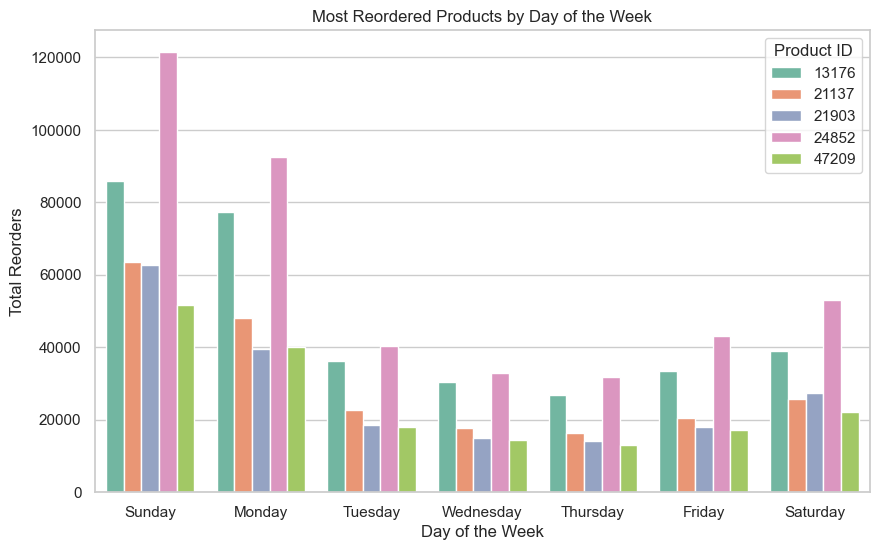

In [73]:
# Most Reordered Products on Specific Days of the Week:

# Step 1: Calculate the total reorders for each product and day of the week
most_reordered_products_per_day = final_df.groupby(['product_id', 'most_common_order_dow']).agg({
    'total_reorders_by_user': 'sum'
}).reset_index()

# Step 2: Find the top 5 most reordered products
top_5_products = most_reordered_products_per_day.groupby('product_id')['total_reorders_by_user'].sum().sort_values(ascending=False).head(5).index

# Step 3: Filter the data to only include the top 5 most reordered products
top_5_products_data = most_reordered_products_per_day[most_reordered_products_per_day['product_id'].isin(top_5_products)]

# Step 4: Create a mapping of numeric days to actual day names
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
top_5_products_data['day_name'] = top_5_products_data['most_common_order_dow'].map(day_names)

# Step 5: Plot the reorder trends of the top 5 most reordered products by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='total_reorders_by_user', hue='product_id', data=top_5_products_data, palette='Set2')
plt.title('Most Reordered Products by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Reorders')
plt.legend(title='Product ID')
plt.show()
